 # Emotional Detection using Eye-tracking and ECG/GSR Data for Interpersonal Communications

 ### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.preprocessing import MinMaxScaler
def normalize_df(df, method='normal'):
    if(method == 'normal'):
        return pd.DataFrame(MinMaxScaler().fit_transform(df))

from sklearn.preprocessing import StandardScaler
def standardize_np(arr, method='normal'):
    scaled = arr
    if(method == 'normal'):
        scaled = StandardScaler().fit_transform(scaled)
    return scaled

Load data

In [3]:
data_eye = pd.read_csv("archive/04 Eye Tracking Data/02 Eye Tracking Data (Features Extracted)/EyeTracking_FeaturesExtracted.csv")
data_ecg = pd.read_csv("archive/05 ECG-GSR Data/02 ECG-GSR (Features Extracted)/ECG_FeaturesExtracted.csv")
data_gsr = pd.read_csv("archive/05 ECG-GSR Data/02 ECG-GSR (Features Extracted)/GSR_FeaturesExtracted.csv")

data_eye = data_eye.loc[:, ~data_eye.columns.isin([''])]
data_ecg = data_ecg.loc[:, ~data_ecg.columns.isin(['Quad_Cat'])]
data_gsr = data_gsr.loc[:, ~data_gsr.columns.isin(['Quad_Cat'])]

data = pd.concat([data_eye, data_ecg, data_gsr],axis=1)

df = data.dropna(axis='columns')

In [4]:
data

Quad_Cat  Num_of_Fixations  Mean_Fixation_Duration  SD_Fixation_Duration  \
0           1          0.605556             1208.440367           1013.049251   
1           0          0.459184             1796.311111           1880.259542   
2           0          0.480000             1617.694444           1895.391401   
3           3          0.454545             1858.763636           2711.244828   
4           1          0.527778             1582.126316           1520.578818   
..        ...               ...                     ...                   ...   
307         2          0.448276             2023.403846           2121.443120   
308         0          0.278146             3123.047619           3834.811402   
309         1          0.490683             1419.607595           1361.960488   
310         3          0.437500             1861.714286           1994.288957   
311         3          0.520000             1458.410256           1438.600448   

     Skew_Fixation_Duration  Max_Fixation_Duration  First_Fixation_Duration  \
0                  2.080900                   6127                     1640   
1                  2.346293                   9773                      556   
2                  1.633123                   7573                      671   
3                  3.296111                  14840                     1804   
4                  1.862892                   7526                     1315   
..                      ...                    ...                      ...   
307                2.327756                  11573                     7313   
308                1.773834                  17653                     6507   
309                2.560576                   7691                      791   
310                2.229175                  10014                     1058   
311                1.570553                   5857                      799   

     Num_of_Saccade  Mean_Saccade_Duration  SD_Saccade_Duration  ...  \
0          0.605556             438.064220           517.053212  ...   
1          0.448980             392.000000           426.838023  ...   
2          0.466667             481.314286           528.473650  ...   
3          0.446281             349.240741           427.406260  ...   
4          0.522222             311.531915           355.951480  ...   
..              ...                    ...                  ...  ...   
307        0.439655             222.294118           302.584487  ...   
308        0.278146             469.476190           457.909472  ...   
309        0.484472             635.935897           742.269341  ...   
310        0.425000             437.735294           637.969473  ...   
311        0.520000             473.333333           358.923121  ...   

        pnn20  Pnn50pnn20       Mean        SD  Variance    Minimum  \
0    0.481013    0.995614   3.560146  0.139966  0.019591   3.317403   
1    0.477178    1.000000   5.567496  0.659287  0.434660   4.043869   
2    0.459459    1.000000   4.072888  0.530539  0.281472   2.393337   
3    0.438127    0.969466   5.407625  0.891521  0.794809   3.213556   
4    0.487069    0.986726   3.232517  0.159728  0.025513   2.973926   
..        ...         ...        ...       ...       ...        ...   
307  0.509615    0.874214  14.410291  0.433929  0.188294  13.867889   
308  0.623116    0.987903  18.157660  2.428589  5.898046  12.773990   
309  0.562061    0.945833  11.421539  0.453921  0.206044  10.802553   
310  0.585000    0.991453  11.815905  0.314503  0.098912  11.467421   
311  0.648649    1.000000  11.546383  0.181757  0.033036  11.309876   

       Maximum  Number of Peaks  Number of Valleys         Ratio  
0     3.982484         0.000019           0.000019  5.300000e-11  
1     7.146960         0.000036           0.000036  1.880000e-10  
2     4.711197         0.000041           0.000041  2.820000e-10  
3     7.700064         0.000041           0.000041  1.910000e-10  
4     3.608285         0.00003

In [5]:
# Count each Quad_Cat instances
print(len([i for i in list(df.Quad_Cat) if i == 0]))
print(len([i for i in list(df.Quad_Cat) if i == 1]))
print(len([i for i in list(df.Quad_Cat) if i == 2]))
print(len([i for i in list(df.Quad_Cat) if i == 3]))

78
78
78
78


In [6]:
feature_names = df.columns
print(feature_names)

Index(['Quad_Cat', 'Num_of_Fixations', 'Mean_Fixation_Duration',
       'SD_Fixation_Duration', 'Skew_Fixation_Duration',
       'Max_Fixation_Duration', 'First_Fixation_Duration', 'Num_of_Saccade',
       'Mean_Saccade_Duration', 'SD_Saccade_Duration', 'Skew_Saccade_Duration',
       'Max_Saccade_Duration', 'Mean_Saccade_Amplitude',
       'SD_Saccade_Amplitude', 'Skew_Saccade_Amplitude',
       'Max_Saccade_Amplitude', 'Mean_Saccade_Direction',
       'SD_Saccade_Direction', 'Skew_Saccade_Direction',
       'Max_Saccade_Direction', 'Mean_Saccade_Length', 'SD_Saccade_Length',
       'Skew_Saccade_Length', 'Max_Saccade_Length', 'Num_of_Blink',
       'Num_of_Microsac', 'Mean_Microsac_Peak_Vel', 'SD_Microsac_Peak_Vel',
       'Skew_Microsac_Peak_Vel', 'Max_Microsac_Peak_Vel', 'Mean_Microsac_Ampl',
       'SD_Microsac_Ampl', 'Skew_Microsac_Ampl', 'Max_Microsac_Ampl',
       'Mean_Microsac_Dir', 'SD_Microsac_Dir', 'Skew_Microsac_Dir',
       'Max_Microsac_Dir', 'Mean_Microsac_H_Amp', 'SD_

In [7]:
df_sorted = df.sort_values(by='Quad_Cat')
df_normalized = normalize_df(df_sorted)

In [8]:
df_normalized

0         1         2         3         4         5         6   \
0    0.0  0.502513  0.032460  0.064802  0.278190  0.099287  0.265808   
1    0.0  0.661271  0.017190  0.037742  0.342905  0.065437  0.268943   
2    0.0  0.546039  0.032762  0.081818  0.536523  0.163219  0.097076   
3    0.0  0.204842  0.113583  0.185765  0.231151  0.250766  0.289416   
4    0.0  0.885649  0.004312  0.009049  0.283303  0.020294  0.033882   
..   ...       ...       ...       ...       ...       ...       ...   
307  1.0  0.709653  0.018205  0.039235  0.410928  0.089418  0.068482   
308  1.0  0.765786  0.008348  0.046776  0.697801  0.115988  0.037357   
309  1.0  0.734572  0.007441  0.005145  0.164958  0.007415  0.039133   
310  1.0  0.346269  0.065363  0.117150  0.174124  0.125451  0.078945   
311  1.0  0.745809  0.011459  0.029425  0.285928  0.037931  0.018584   

           7         8         9   ...        62        63        64  \
0    0.500212  0.369494  0.348231  ...  0.631041  0.842782  0.383651   
1    0.655668  0.404762  0.324326  ...  0.665137  0.933333  0.224846   
2    0.542833  0.145382  0.151671  ...  0.516278  0.885714  0.322124   
3    0.199016  0.325957  0.304273  ...  0.569470  0.891554  0.293442   
4    0.855818  0.458204  0.401750  ...  0.693052  0.940092  0.213679   
..        ...       ...       ...  ...       ...       ...       ...   
307  0.690919  0.216910  0.285701  ...  0.686635  0.838509  0.315022   
308  0.738449  0.538303  0.647415  ...  0.492567  0.801020  0.082350   
309  0.709106  0.658484  0.805334  ...  0.330686  0.877820  0.114989   
310  0.347218  0.067511  0.083409  ...  0.838310  0.690476  0.307007   
311  0.738449  0.432436  0.321355  ...  1.000000  1.000000  0.362645   

           65        66        67        68        69        70        71  
0    0.184217  0.035062  0.386248  0.409105  0.617178  0.627845  0.305606  
1    0.145566  0.022121  0.219611  0.258379  0.493252  0.493976  0.244123  
2    0.272121  0.075534  0.310632  0.421775  0.252761  0.183400  0.254973  
3    0.159100  0.026315  0.282172  0.313970  0.246626  0.314592  0.121881  
4    0.195926  0.039567  0.199909  0.265328  0.168098  0.183400  0.169801  
..        ...       ...       ...       ...       ...       ...       ...  
307  0.104689  0.011662  0.292555  0.303681  0.791411  0.863454  0.537071  
308  0.033407  0.001358  0.084765  0.084060  0.349693  0.285141  0.367089  
309  0.165631  0.028469  0.082623  0.145000  0.417178  0.455154  0.417722  
310  0.053137  0.003200  0.323248  0.290312  0.261350  0.190094  0.274864  
311  0.042382  0.002100  0.385164  0.332128  0.000000  0.000000  0.000000  

[312 rows x 72 columns]

In [9]:
list_exceptions = ['Quad_Cat']

X = df.loc[:, ~df.columns.isin(list_exceptions)].values
y = df["Quad_Cat"].astype('int32').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [10]:
X_train

array([[4.26666667e-01, 1.91228125e+03, 2.30115499e+03, ...,
        4.11000000e-05, 4.11000000e-05, 2.82000000e-10],
       [6.16666667e-01, 1.06120721e+03, 9.13292238e+02, ...,
        3.30000000e-05, 3.58000000e-05, 9.08000000e-11],
       [2.27777778e-01, 4.12943902e+03, 3.73960812e+03, ...,
        8.27000000e-06, 8.27000000e-06, 2.28000000e-11],
       ...,
       [4.65116279e-01, 1.64838750e+03, 2.53985904e+03, ...,
        8.68000000e-06, 5.79000000e-06, 2.51000000e-11],
       [5.25000000e-01, 1.47335714e+03, 2.12310855e+03, ...,
        6.11000000e-05, 6.11000000e-05, 4.15000000e-10],
       [3.54651163e-01, 2.61032787e+03, 3.39253087e+03, ...,
        3.47000000e-05, 3.47000000e-05, 1.00000000e-10]])

In [11]:
y_train

array([0, 1, 1, 0, 3, 3, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 3, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 3, 3, 1, 1, 0, 3, 3, 1, 1, 1, 2, 1, 1, 3, 2,
       3, 1, 0, 2, 1, 3, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0, 1, 0, 3, 1, 0,
       2, 1, 3, 3, 1, 2, 3, 2, 3, 0, 1, 3, 3, 2, 2, 3, 1, 2, 2, 0, 2, 1,
       0, 1, 3, 1, 2, 2, 0, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0, 2, 2, 2, 3, 3,
       1, 0, 0, 1, 1, 3, 1, 0, 1, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 1, 0, 1,
       3, 2, 0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1, 0, 3,
       0, 0, 1, 3, 2, 3, 1, 1, 2, 2, 1, 0, 3, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       3, 0, 3, 0, 0, 2, 3, 1, 0, 0, 3, 3, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 3, 0, 0, 2, 3, 2, 3, 0, 3, 3, 1,
       0, 0, 3, 0, 0, 2, 2, 1, 2, 3, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 2, 1,
       2, 3, 1, 2, 2, 3, 2])

In [12]:
len(y_train)

249

 ## Feature Analysis

##### 1-on-1 feature correlation using Pearson correlation

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# Pandas Correlation by:
    # pearson : standard correlation coefficient
    # kendall : Kendall Tau correlation coefficient
    # spearman : Spearman rank correlation
# Seaborn Heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
def correlation_heatmap(df, method, abs=0):
    if(abs==0):
        correlations = df.corr(method=method)
        fig, ax = plt.subplots(figsize=(60,60))
        sns.heatmap(correlations, vmin=-1.0, vmax=1.0, center=0, cmap="Reds",fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
        plt.show();
    elif(abs==1):
        correlations = df.corr(method=method).abs()
        fig, ax = plt.subplots(figsize=(60,60))
        sns.heatmap(correlations, vmin=0.0, vmax=1.0, center=0.5, cmap="Reds",fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
        plt.show();

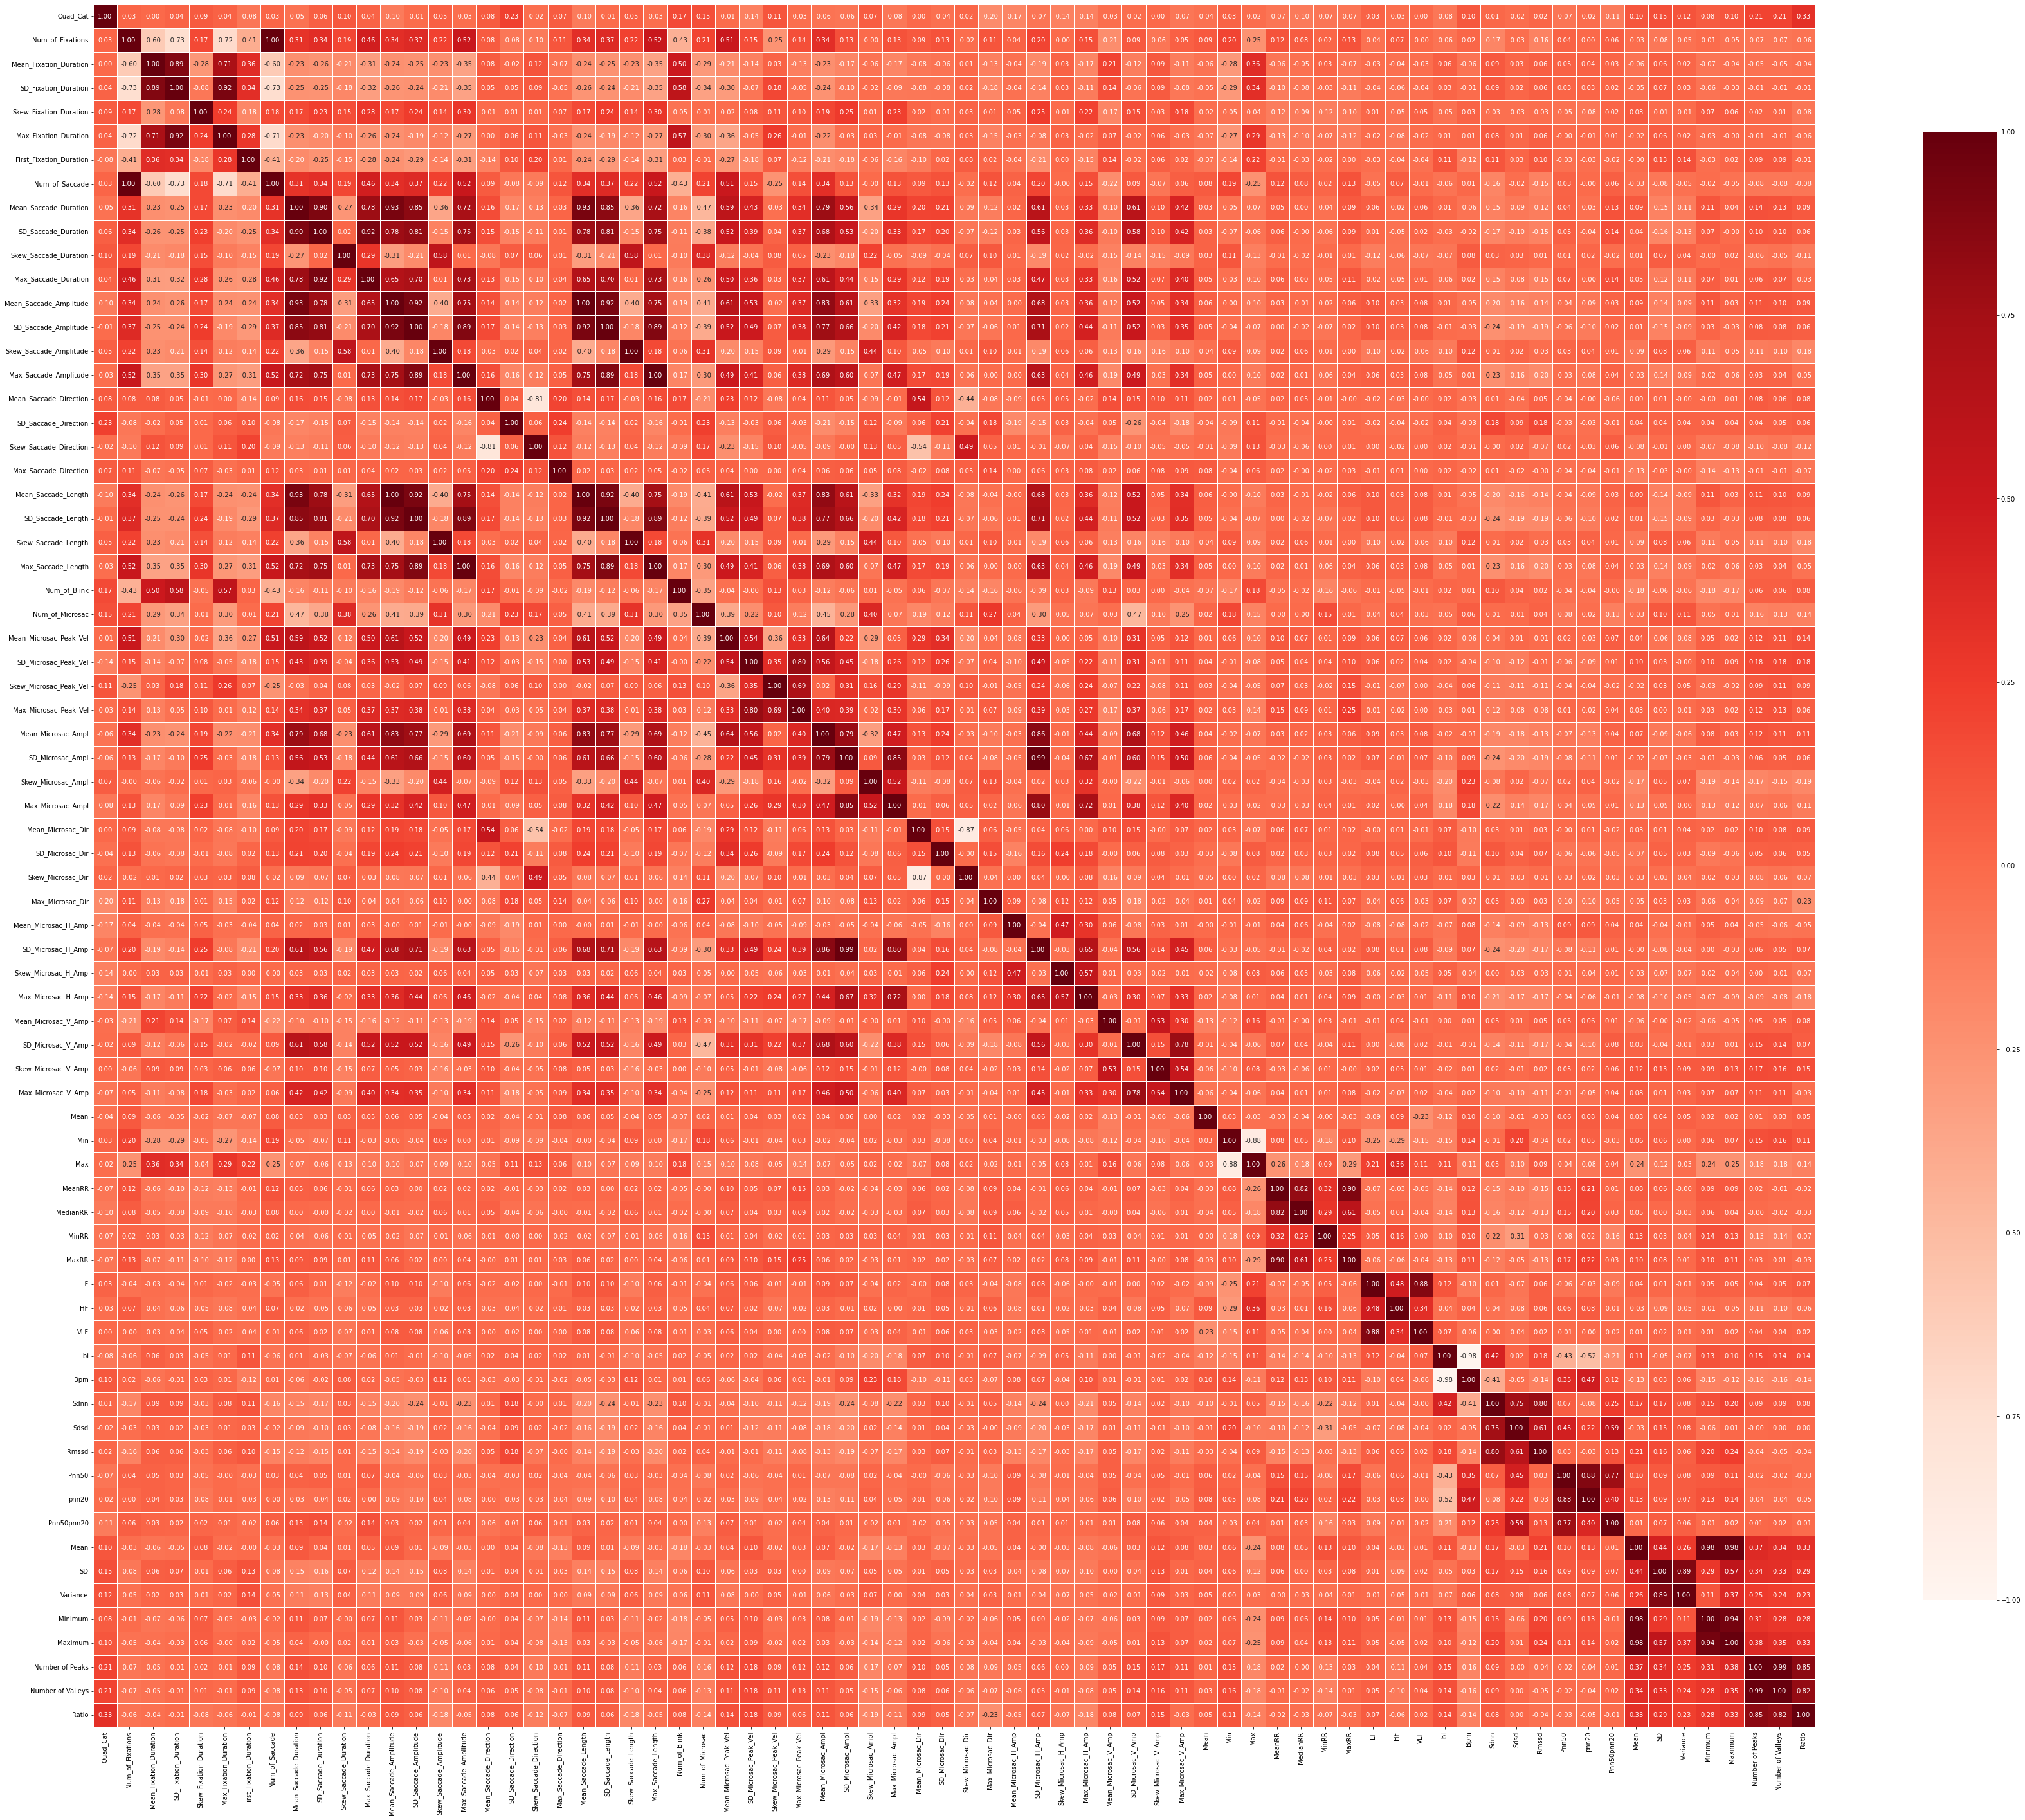

In [14]:
correlation_heatmap(df,'pearson')

In [15]:
df.corr()['Quad_Cat']

Quad_Cat                  1.000000
Num_of_Fixations          0.030645
Mean_Fixation_Duration    0.001180
SD_Fixation_Duration      0.038172
Skew_Fixation_Duration    0.085666
                            ...   
Minimum                   0.075851
Maximum                   0.102487
Number of Peaks           0.210473
Number of Valleys         0.206013
Ratio                     0.327791
Name: Quad_Cat, Length: 72, dtype: float64

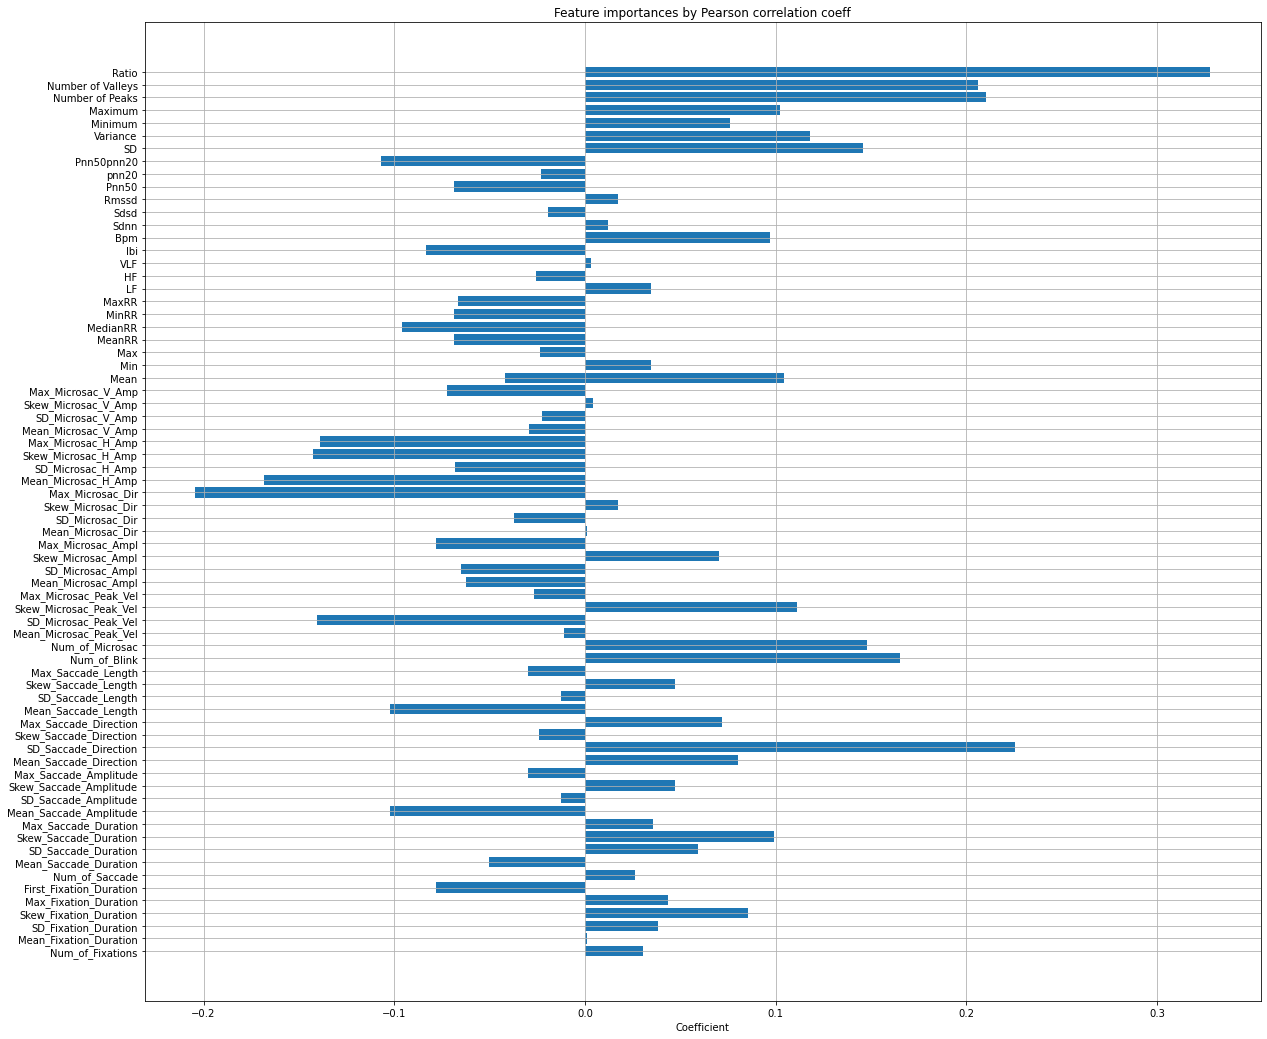

In [16]:
fig = plt.figure(figsize=(20,18))
plt.barh(df.columns[1:], df.corr()['Quad_Cat'].values[1:])
plt.xlabel('Coefficient')
plt.title('Feature importances by Pearson correlation coeff')
plt.grid()
plt.show()

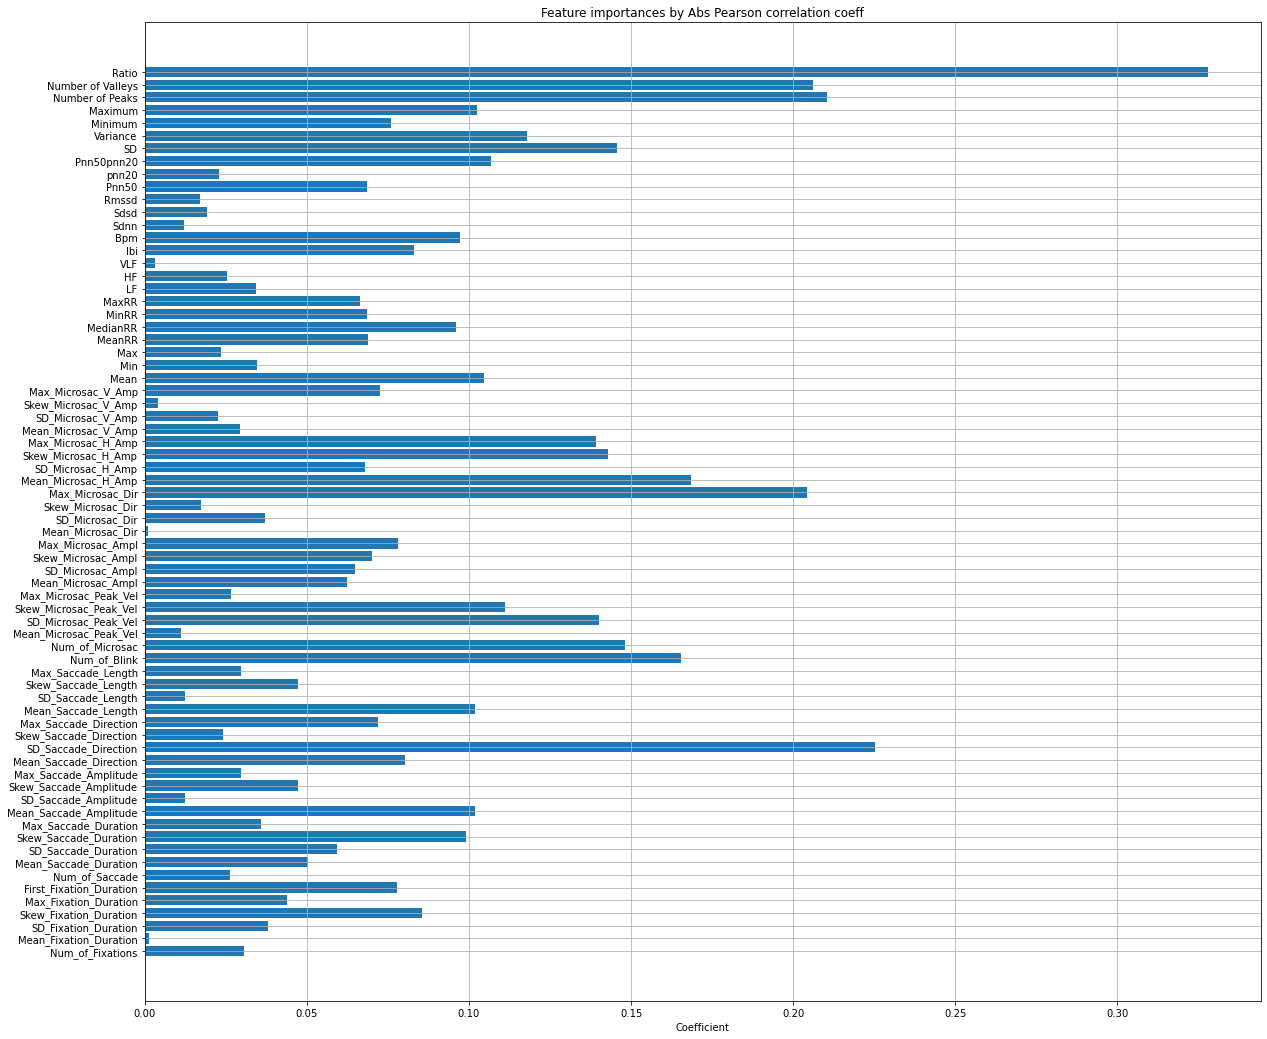

In [17]:
fig = plt.figure(figsize=(20,18))
plt.barh(df.columns[1:], [abs(i) for i in df.corr()['Quad_Cat'].values[1:]])
plt.xlabel('Coefficient')
plt.title('Feature importances by Abs Pearson correlation coeff')
plt.grid()
plt.show()

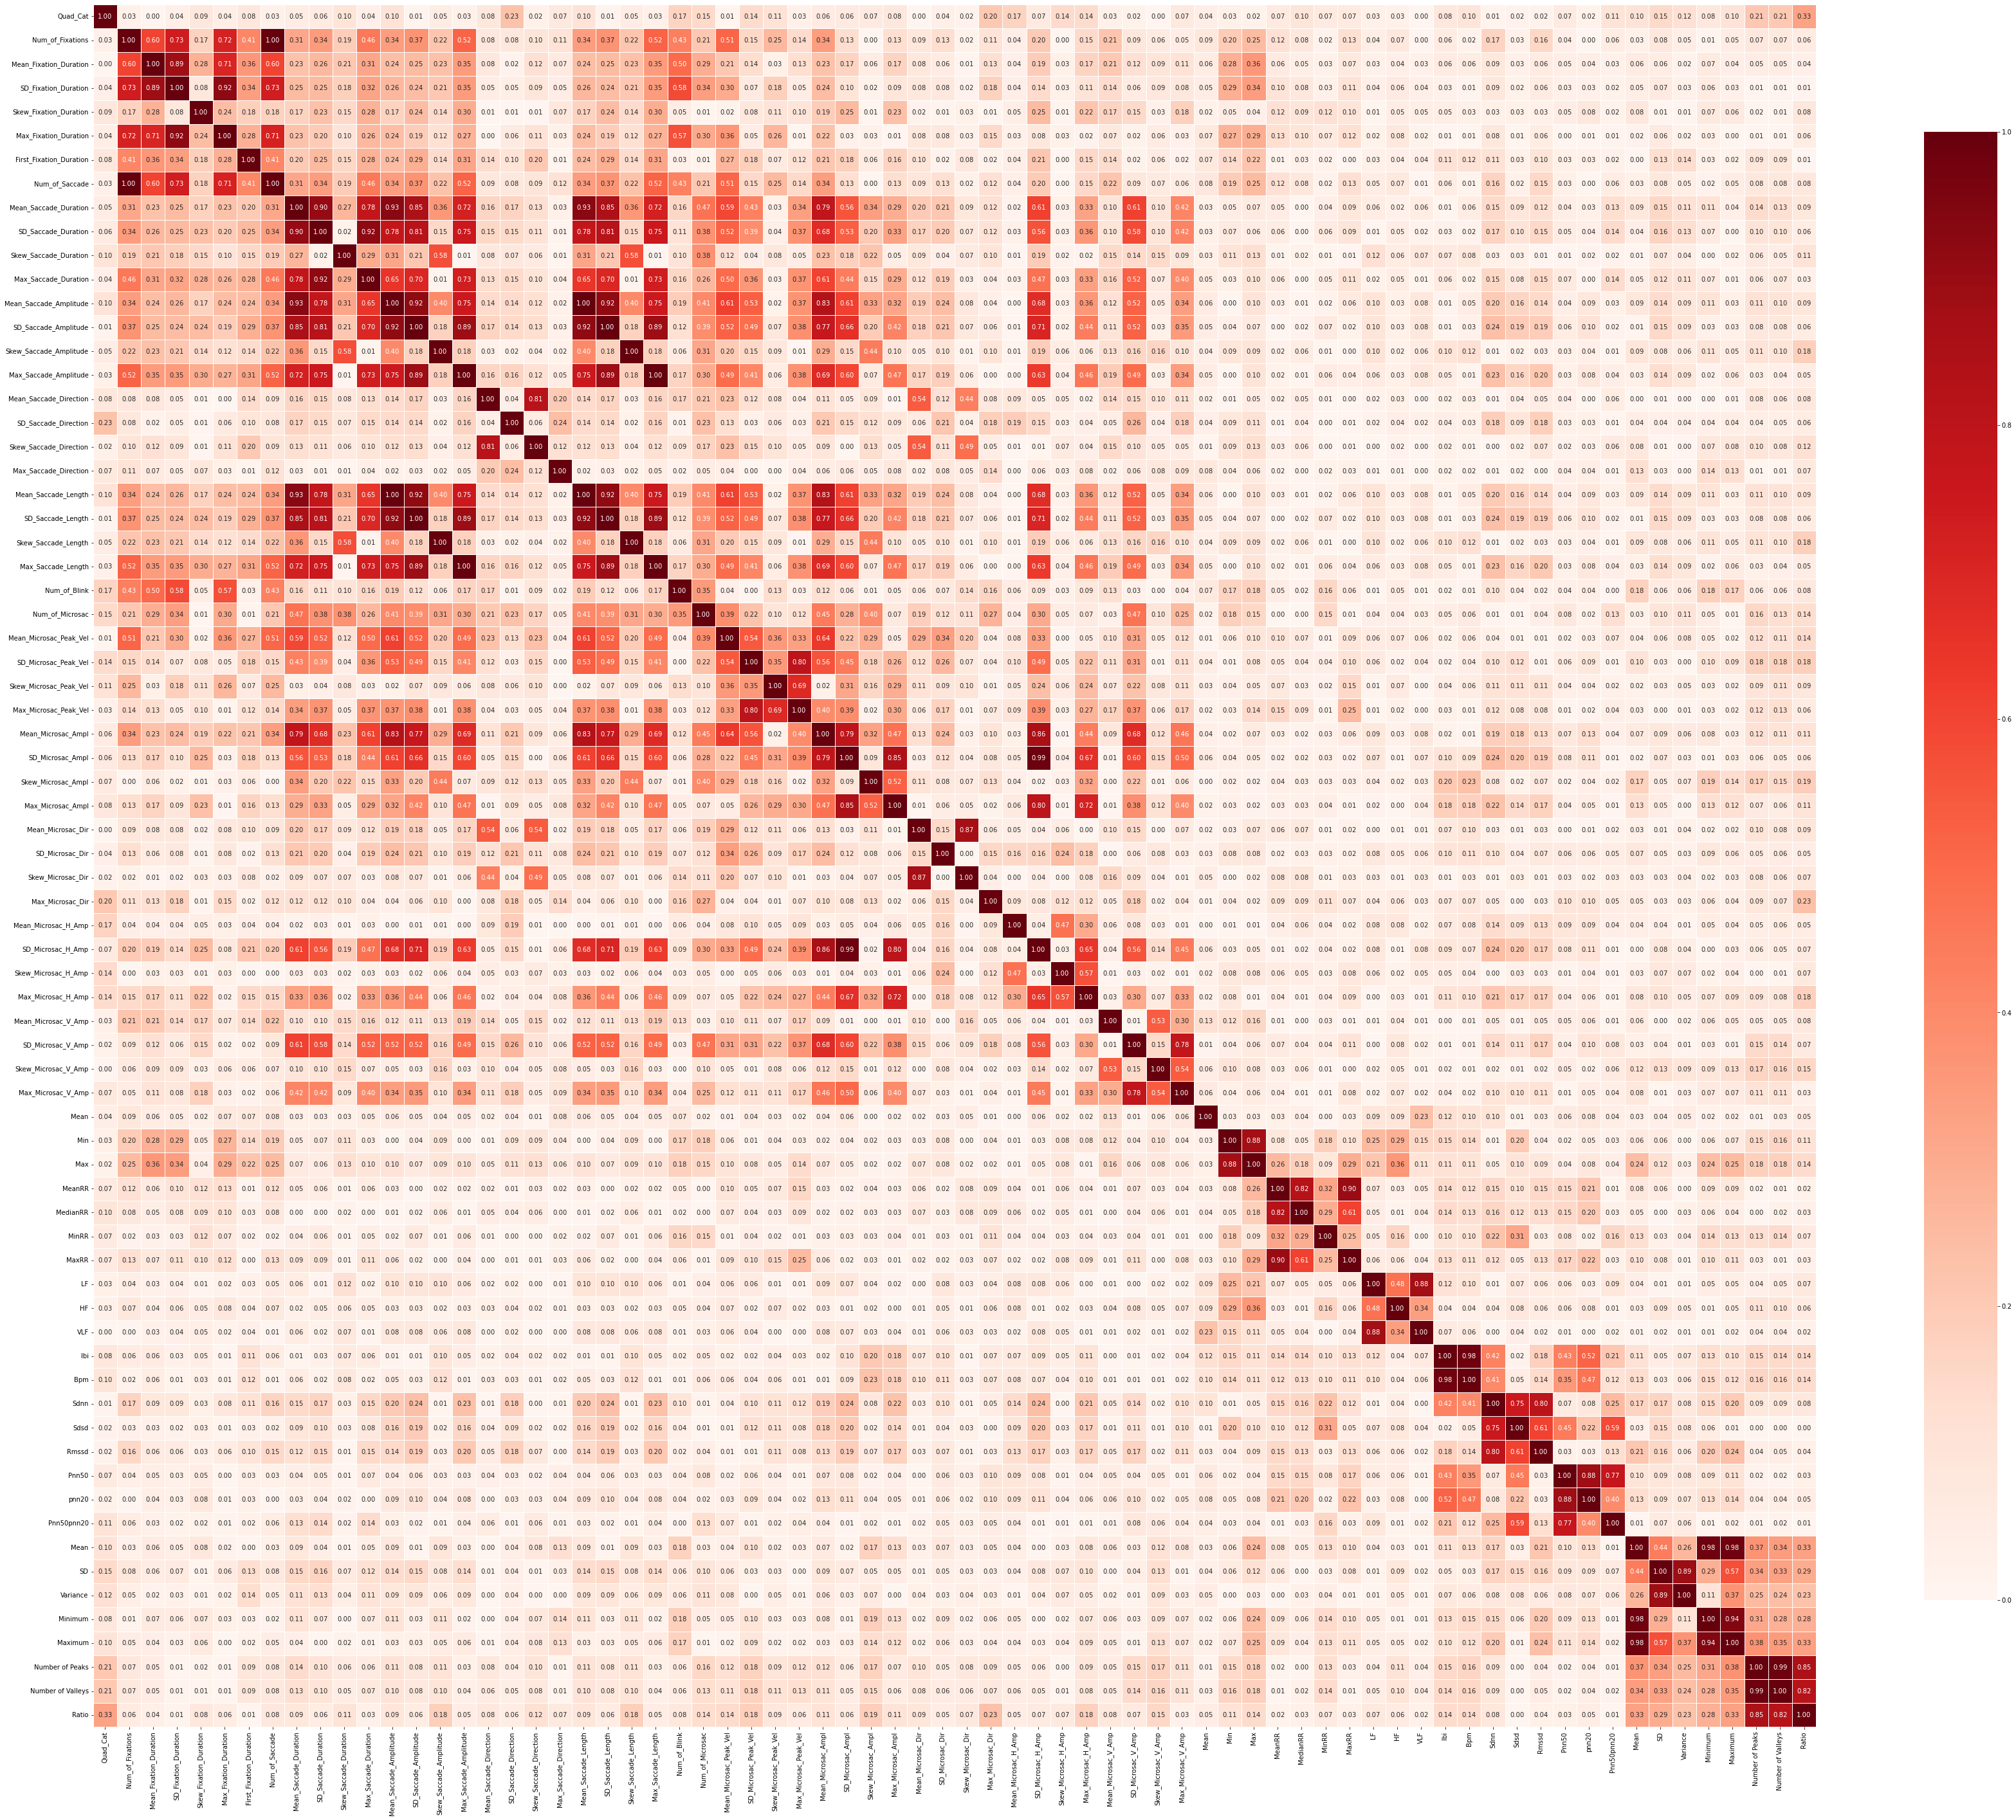

In [18]:
correlation_heatmap(df,'pearson',abs=1)

 ##### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=8)
dt_model = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.38095238095238093

In [20]:
print(dt_model.feature_importances_)
print("Number of features: " + str(len(dt_model.feature_importances_)))

[0.         0.         0.         0.02449311 0.         0.06041295
 0.0111044  0.         0.0055522  0.01665661 0.         0.02729121
 0.         0.         0.06500514 0.03764487 0.07185384 0.
 0.0055522  0.         0.         0.         0.         0.
 0.02289277 0.01869402 0.0851753  0.0125916  0.         0.02297899
 0.         0.         0.         0.0055522  0.         0.01665661
 0.02780508 0.02323993 0.02568458 0.02304164 0.01526856 0.
 0.03155954 0.         0.         0.00740294 0.         0.0055522
 0.         0.00888352 0.01796161 0.0083283  0.         0.
 0.         0.02209865 0.0141435  0.0106216  0.         0.
 0.         0.03001053 0.03651234 0.         0.02888021 0.01499095
 0.0083283  0.         0.         0.129578   0.        ]
Number of features: 71


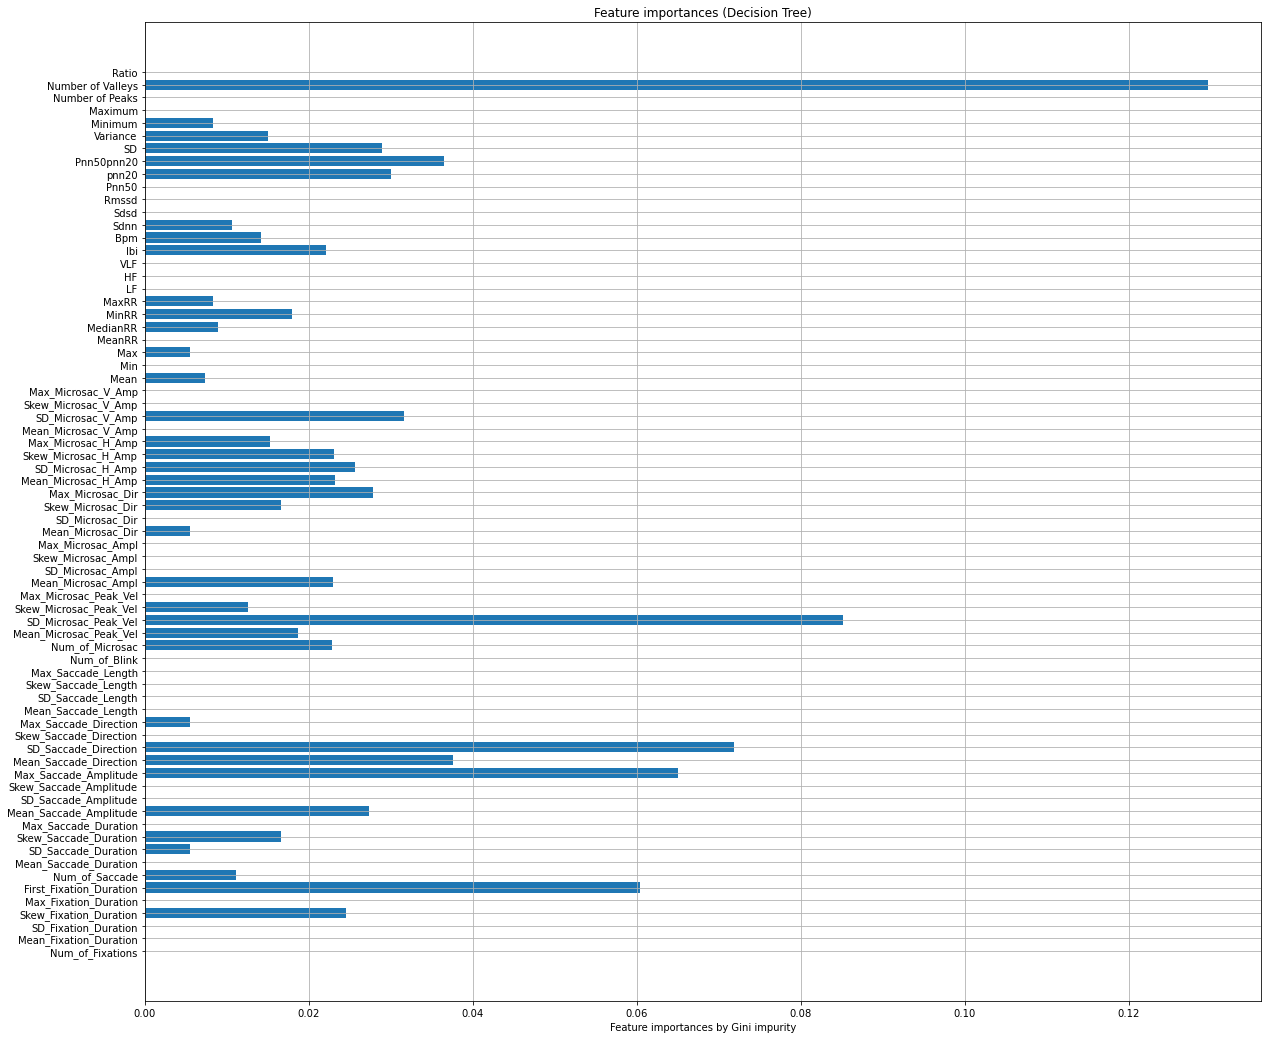

In [21]:
fig = plt.figure(figsize=(20,18))
plt.barh(feature_names[1:], dt_model.feature_importances_)
plt.xlabel('Feature importances by Gini impurity')
plt.title('Feature importances (Decision Tree)')
plt.grid()
plt.show()

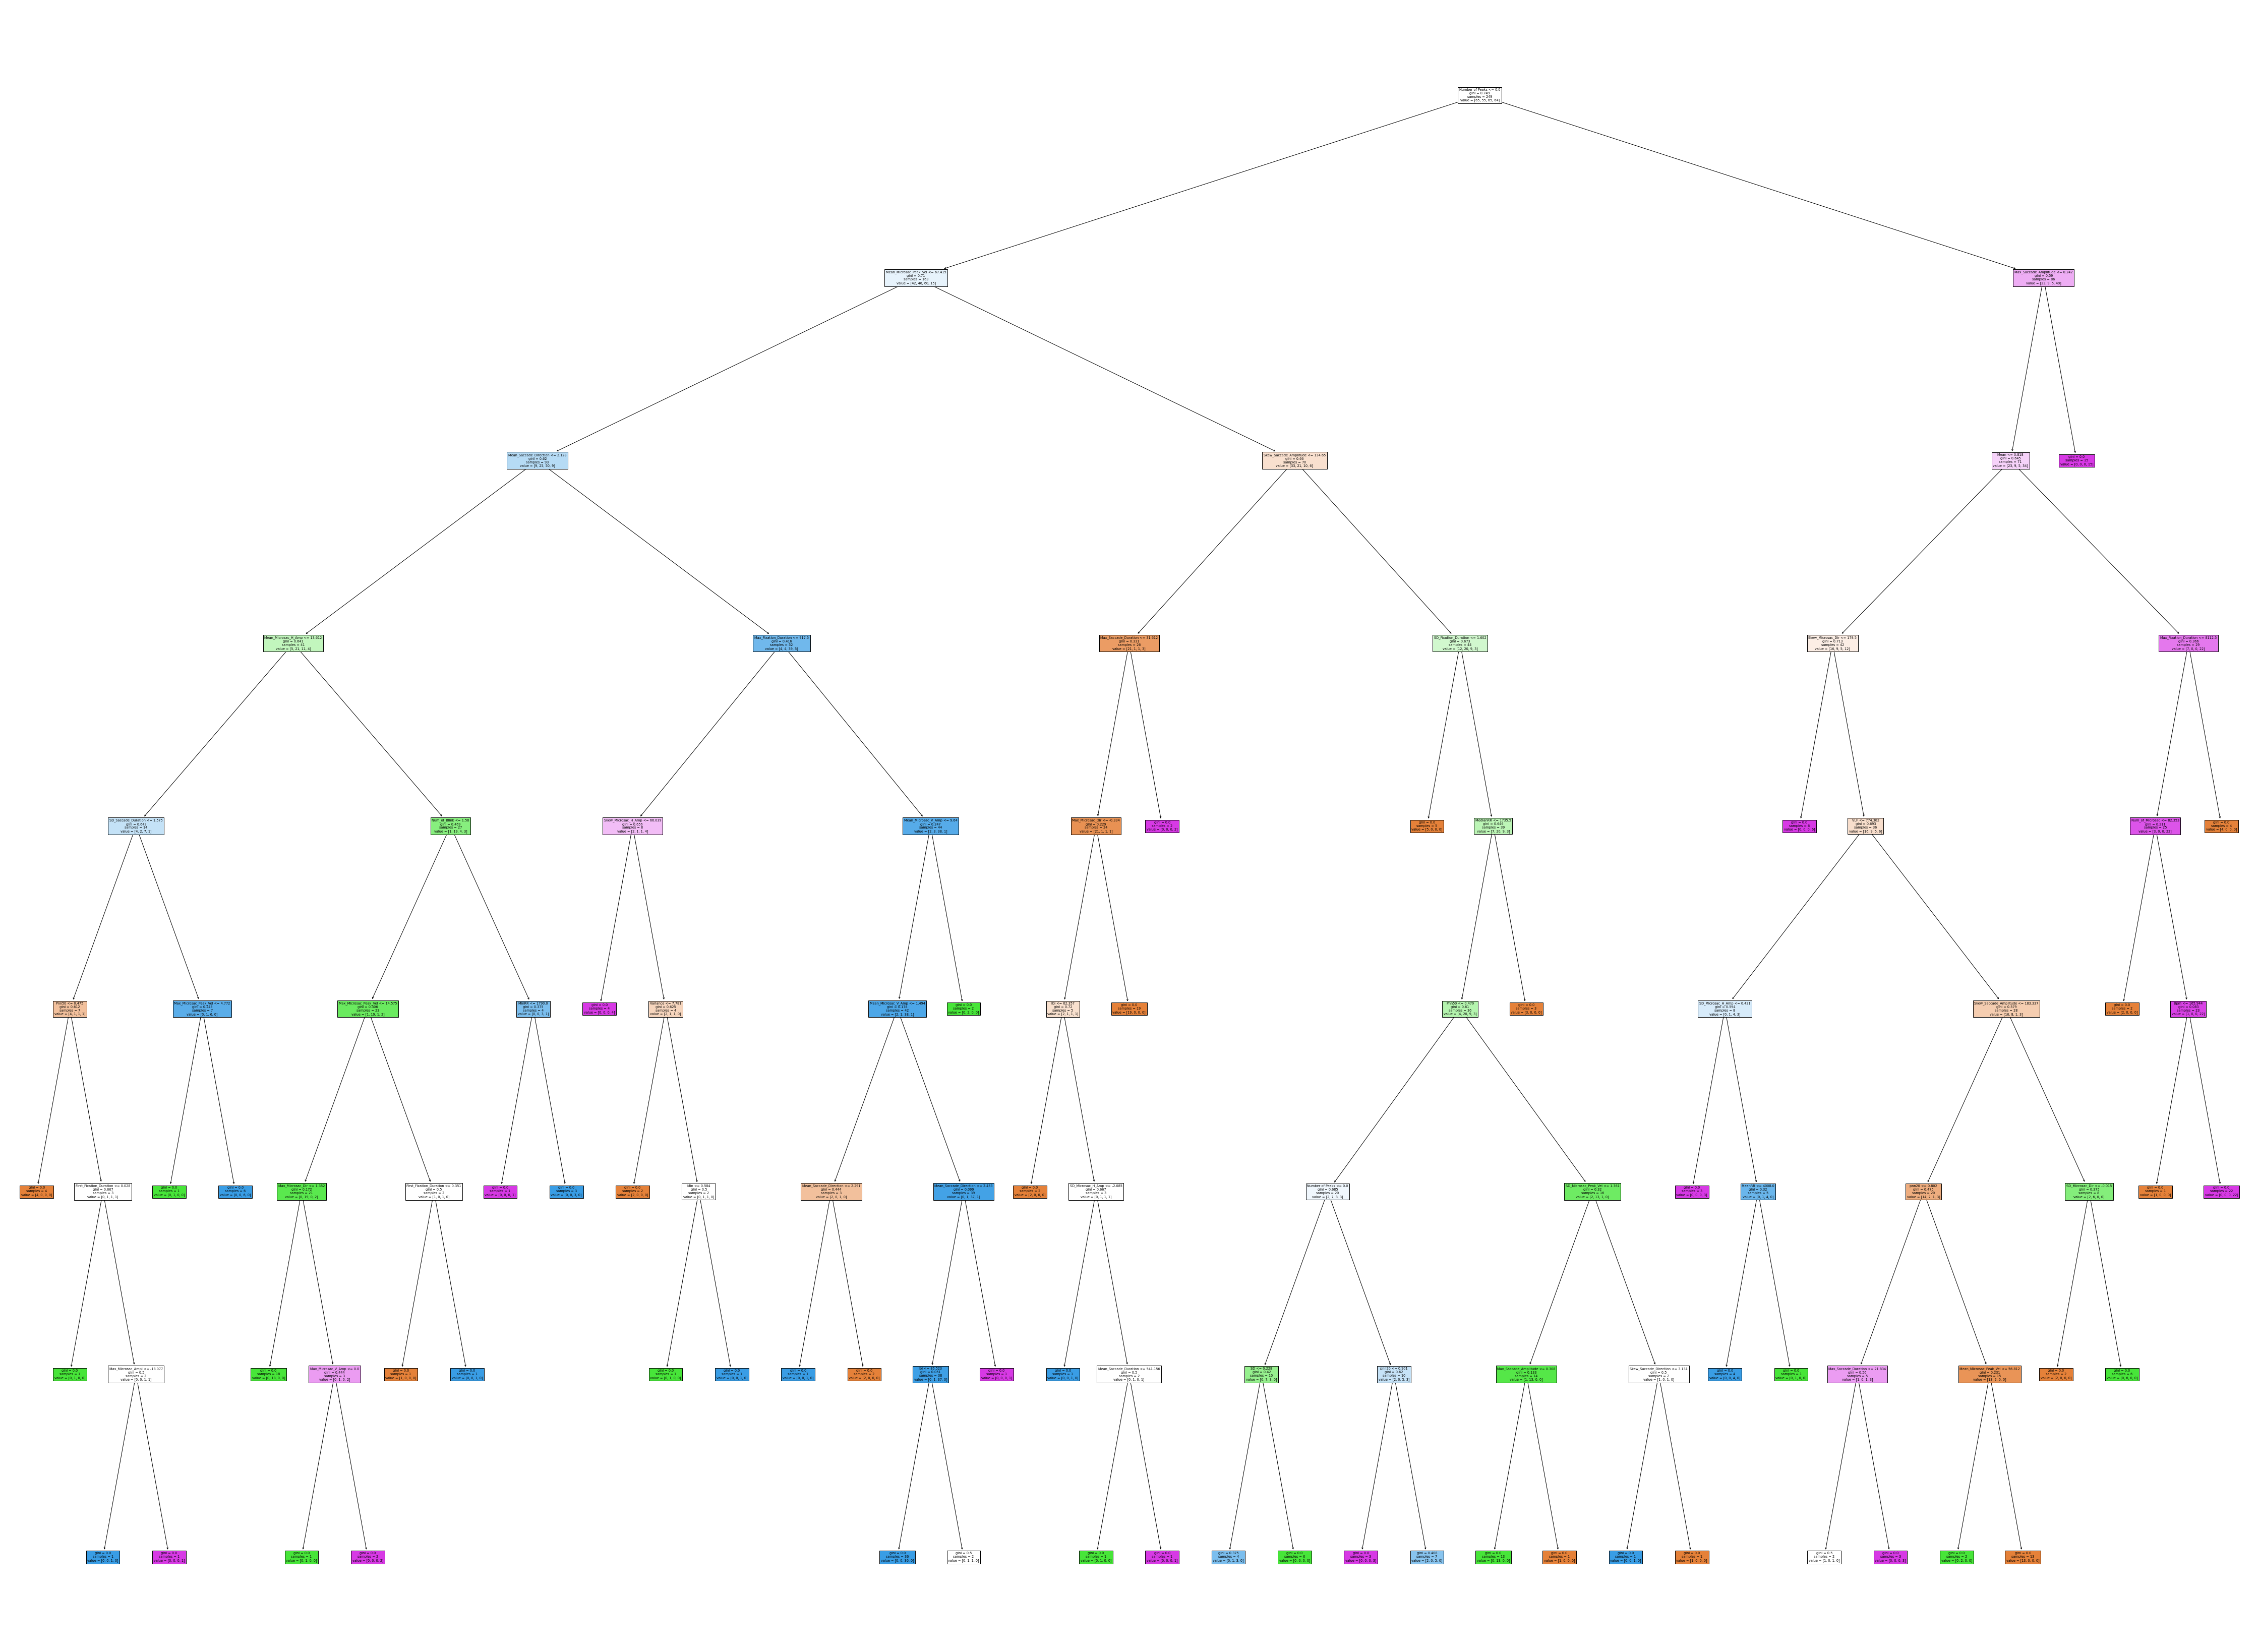

In [22]:
fig = plt.figure(figsize=(80,60))
tree.plot_tree(clf,feature_names=feature_names,filled=True)
plt.show()

 ### Ensemble

In [23]:
from sklearn.ensemble import AdaBoostClassifier


def ada_boost(X_train,y_train, X_test, y_test, m=4):
    # if(x is None and y is None):
    #     # Load data
    #     iris = datasets.load_iris()
    #     X = iris.data
    #     y = iris.target
     
    # Split dataset into training set and test set
    
     
    # Create adaboost classifer object
    abc = AdaBoostClassifier(n_estimators=m, learning_rate=1)
    # Train Adaboost Classifer
    model = abc.fit(X_train, y_train)
     
    # Predict the response for test dataset
    y_pred = model.predict(X_test)
     
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return model
    
# correlation_heatmap(clean_data, 'pearson')
# correlation_heatmap(clean_data, 'kendall')
# correlation_heatmap(clean_data, 'spearman')

#ada_boost(None,None)
adaboost_model = ada_boost(X_train,y_train, X_test, y_test,10)

Accuracy: 0.38095238095238093


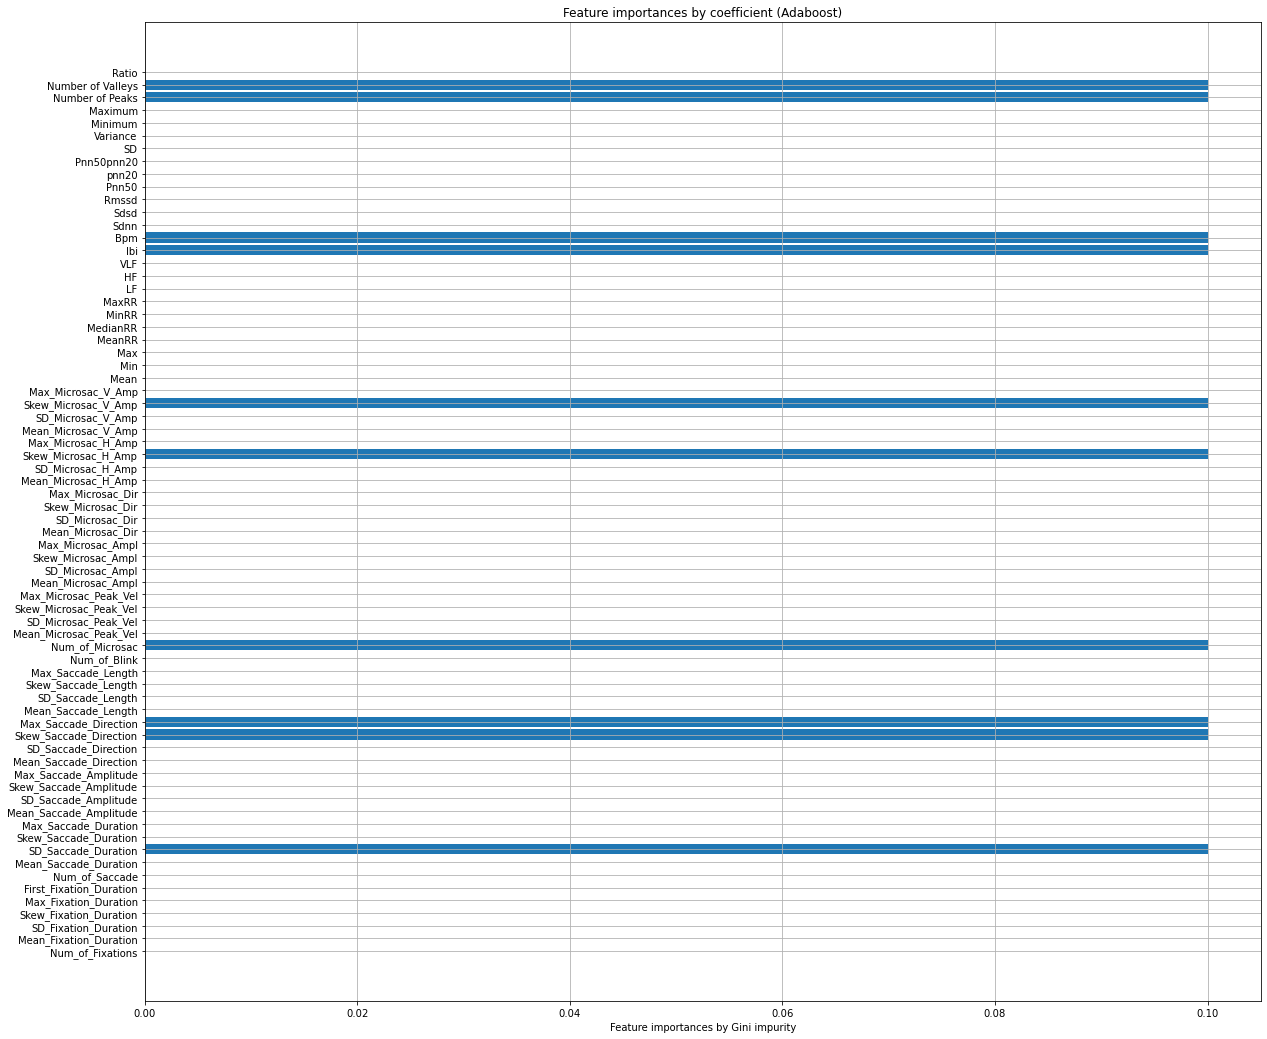

In [24]:
fig = plt.figure(figsize=(20,18))
plt.barh(feature_names[1:], adaboost_model.feature_importances_)
plt.xlabel('Feature importances by Gini impurity')
plt.title('Feature importances by coefficient (Adaboost)')
plt.grid()
plt.show()

# Baseline

In [25]:
X_train

array([[4.26666667e-01, 1.91228125e+03, 2.30115499e+03, ...,
        4.11000000e-05, 4.11000000e-05, 2.82000000e-10],
       [6.16666667e-01, 1.06120721e+03, 9.13292238e+02, ...,
        3.30000000e-05, 3.58000000e-05, 9.08000000e-11],
       [2.27777778e-01, 4.12943902e+03, 3.73960812e+03, ...,
        8.27000000e-06, 8.27000000e-06, 2.28000000e-11],
       ...,
       [4.65116279e-01, 1.64838750e+03, 2.53985904e+03, ...,
        8.68000000e-06, 5.79000000e-06, 2.51000000e-11],
       [5.25000000e-01, 1.47335714e+03, 2.12310855e+03, ...,
        6.11000000e-05, 6.11000000e-05, 4.15000000e-10],
       [3.54651163e-01, 2.61032787e+03, 3.39253087e+03, ...,
        3.47000000e-05, 3.47000000e-05, 1.00000000e-10]])

In [26]:
abs(X_test)

array([[3.62068966e-01, 2.61592857e+03, 2.84957308e+03, ...,
        1.31000000e-05, 8.74000000e-06, 5.73000000e-11],
       [5.88888889e-01, 1.42505660e+03, 1.42793632e+03, ...,
        5.51000000e-06, 5.51000000e-06, 1.52000000e-11],
       [3.73333333e-01, 2.37092857e+03, 3.10911128e+03, ...,
        1.42000000e-05, 1.42000000e-05, 1.01000000e-10],
       ...,
       [4.69387755e-01, 1.73178261e+03, 1.57122798e+03, ...,
        3.63000000e-05, 3.63000000e-05, 1.88000000e-10],
       [2.79503106e-01, 3.45004444e+03, 3.77522900e+03, ...,
        1.59000000e-05, 1.27000000e-05, 5.03000000e-11],
       [3.43023256e-01, 2.39294915e+03, 3.50824940e+03, ...,
        2.89000000e-05, 2.60000000e-05, 8.37000000e-11]])

### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def nb_gaussian(X_train,y_train, X_test, y_test):
    clf = GaussianNB();
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#     print("Precision:",metrics.precision_score(y_test, y_pred))
#     print("Recall:",metrics.recall_score(y_test, y_pred))
#     print("F-1:",metrics.f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#     disp.plot()
#     plt.show()
    return clf, model, cm, metrics.accuracy_score(y_test, y_pred)

10-fold

In [28]:
cm_10_fold = np.zeros((4,4))
cm_10_fold += np.ones((4,4))
cm_10_fold

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Accuracy: 0.38095238095238093
Accuracy: 0.38095238095238093
Accuracy: 0.4444444444444444
Accuracy: 0.3492063492063492
Accuracy: 0.49206349206349204
Accuracy: 0.4444444444444444
Accuracy: 0.4126984126984127
Accuracy: 0.38095238095238093
Accuracy: 0.25396825396825395
Accuracy: 0.3333333333333333


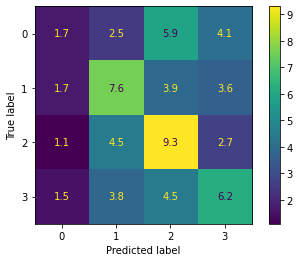

In [29]:
for i in range(10):
    X_nbg_train, X_nbg_test, y_nbg_train, y_nbg_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
    clf,nbg_model,cm,accu = nb_gaussian(X_nbg_train,y_nbg_train, X_nbg_test, y_nbg_test)
    cm_10_fold += cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm_10_fold/10, display_labels=clf.classes_)
disp.plot()
plt.show()

In [30]:
(cm_10_fold[0,0]+cm_10_fold[1,1]+cm_10_fold[2,2]+cm_10_fold[3,3])/sum(sum(list(cm_10_fold)))

0.38390092879256965

### SVM

Accuracy: 0.20634920634920634


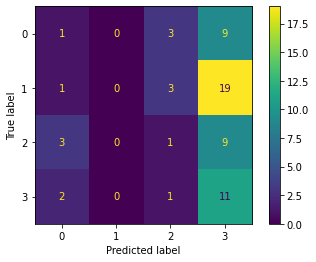

In [45]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def support_vector_machine(X_train,y_train, X_test, y_test):
    # Create svc classifer object
    clf = SVC()
    # Train Adaboost Classifer
    model = clf.fit(X_train, y_train)
     
    # Predict the response for test dataset
    y_pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test, y_pred)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",accu)
    
    cm = confusion_matrix(y_test, y_pred)
    
    return model, cm, accu

svm_model,cm,svm_accu = support_vector_machine(X_train,y_train, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [32]:
cm

array([[ 1,  0,  3,  9],
       [ 1,  0,  3, 19],
       [ 3,  0,  1,  9],
       [ 2,  0,  1, 11]], dtype=int64)

# Selected Features

### Data Selection

In [33]:
selected_features = ['Quad_Cat',
                     'Number of Peaks',
                     'Number of Valleys',
                     'SD_Saccade_Direction',
                     'Max_Microsac_Dir',
                     'SD_Microsac_Dir',
                     'Mean_Microsac_Ampl',
                     'Mean_Microsac_Peak_Vel',
                     'Max_Saccade_Amplitude',
                     'Max_Fixation_Duration',
                     'Bpm ',
                     'Skew_Microsac_H_Amp',
                     'Max_Microsac_Dir',
                     'SD_Microsac_Peak_Vel',
                     'Num_of_Microsac',
                     'Max_Saccade_Length']
df_selected = data.loc[:, data.columns.isin(selected_features)].dropna(axis='columns')

In [34]:
df_selected

Quad_Cat  Max_Fixation_Duration  Max_Saccade_Amplitude  \
0           1                   6127             250.561901   
1           0                   9773             150.589219   
2           0                   7573             140.845506   
3           3                  14840             144.931400   
4           1                   7526             132.156254   
..        ...                    ...                    ...   
307         2                  11573              75.064098   
308         0                  17653             133.090463   
309         1                   7691             238.151724   
310         3                  10014             105.142150   
311         3                   5857              97.896908   

     SD_Saccade_Direction  Max_Saccade_Length  Num_of_Microsac  \
0                1.934984          250.587340         0.966667   
1                2.038649          150.604508         1.153061   
2                2.055253          140.859806         0.973333   
3                2.125495          144.946115         1.719008   
4                2.005192          132.169672         0.894444   
..                    ...                 ...              ...   
307              2.380389           75.071719         1.965517   
308              1.951957          133.103975         0.973510   
309              2.058297          238.175904         0.670807   
310              1.893423          105.152826         1.062500   
311              1.955401           97.906847         1.053333   

     Mean_Microsac_Peak_Vel  SD_Microsac_Peak_Vel  Mean_Microsac_Ampl  \
0                163.868694             67.489295           15.457273   
1                143.316068             71.799603           21.851755   
2                134.204266             72.693242           12.566510   
3                113.086733             78.881306           11.294656   
4                141.092563             52.821705           10.787304   
..                      ...                   ...                 ...   
307              100.225630             54.632888            7.560089   
308              110.883333             76.166522           13.118647   
309              192.254257             88.745174           11.998972   
310              131.362437             66.956670           14.723867   
311              131.235727             57.092790           13.552552   

     SD_Microsac_Dir  Max_Microsac_Dir  Skew_Microsac_H_Amp  Number of Peaks  \
0         114.894665        179.719495             3.156580         0.000019   
1         114.100304        179.563907            -8.745373         0.000036   
2         112.532198        179.789091            -2.922202         0.000041   
3         117.013190        179.846777            -3.302714         0.000041   
4         120.587891        179.868585            -2.911459         0.000030   
..               ...               ...                  ...              ...   
307       115.043226        179.918096             0.466416         0.000031   
308       110.149460        179.990011             0.029653         0.000034   
309       118.134827        179.540875            -2.520313         0.000032   
310       115.880284        178.757483            -1.932032         0.000034   
311       107.776122        176.581236            -0.374126         0.000000   

     Number of Valleys  
0             0.000019  
1             0.000036  
2             0.000041  
3             0.000041  
4             0.000030  
..                 ...  
307           0.000026  
308           0.000034  
309           0.000035  
310           0.000041  
311           0.000000  

[312 rows x 14 columns]

In [35]:
sfeature_names = df_selected.loc[:, ~df_selected.columns.isin(list_exceptions)].columns
sfeature_names

Index(['Max_Fixation_Duration', 'Max_Saccade_Amplitude',
       'SD_Saccade_Direction', 'Max_Saccade_Length', 'Num_of_Microsac',
       'Mean_Microsac_Peak_Vel', 'SD_Microsac_Peak_Vel', 'Mean_Microsac_Ampl',
       'SD_Microsac_Dir', 'Max_Microsac_Dir', 'Skew_Microsac_H_Amp',
       'Number of Peaks', 'Number of Valleys'],
      dtype='object')

In [36]:
list_exceptions = ['Quad_Cat']
Xs = df_selected.loc[:, ~df_selected.columns.isin(list_exceptions)].values
Xs

array([[ 6.12700000e+03,  2.50561901e+02,  1.93498402e+00, ...,
         3.15658005e+00,  1.93000000e-05,  1.93000000e-05],
       [ 9.77300000e+03,  1.50589219e+02,  2.03864888e+00, ...,
        -8.74537320e+00,  3.63000000e-05,  3.63000000e-05],
       [ 7.57300000e+03,  1.40845506e+02,  2.05525335e+00, ...,
        -2.92220164e+00,  4.11000000e-05,  4.11000000e-05],
       ...,
       [ 7.69100000e+03,  2.38151724e+02,  2.05829718e+00, ...,
        -2.52031306e+00,  3.17000000e-05,  3.49000000e-05],
       [ 1.00140000e+04,  1.05142150e+02,  1.89342258e+00, ...,
        -1.93203209e+00,  3.40000000e-05,  4.07000000e-05],
       [ 5.85700000e+03,  9.78969078e+01,  1.95540128e+00, ...,
        -3.74125518e-01,  0.00000000e+00,  0.00000000e+00]])

In [37]:
ys = df["Quad_Cat"].astype('int32').values
ys

array([1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1,
       3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2,
       0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2,
       2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3,
       1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0,
       0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3,
       1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1,
       3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2,
       0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2,
       2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3,
       1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0,
       0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3,
       1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1,
       3, 3, 1, 0, 0, 3, 1, 2, 2, 2, 0, 1, 3, 3, 1,

In [38]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2) # 80% training and 20% test

In [39]:
Xs_train

array([[ 2.15570000e+04,  1.08885906e+02,  1.78136158e+00, ...,
        -2.10320891e+00,  2.01000000e-05,  2.35000000e-05],
       [ 1.69600000e+04,  1.70129877e+02,  2.01756821e+00, ...,
        -1.13613957e+00,  8.68000000e-06,  5.79000000e-06],
       [ 7.40000000e+03,  1.60673489e+02,  2.09019643e+00, ...,
         3.70143881e-01,  2.89000000e-05,  2.89000000e-05],
       ...,
       [ 9.31000000e+03,  2.04540230e+02,  2.10505646e+00, ...,
        -2.08985897e+00,  2.75000000e-05,  2.75000000e-05],
       [ 6.72800000e+03,  1.29222025e+02,  2.32895768e+00, ...,
        -1.89521560e+00,  2.62000000e-05,  2.62000000e-05],
       [ 1.30830000e+04,  3.74981011e+01,  2.31087894e+00, ...,
        -7.92388163e+00,  1.31000000e-05,  1.75000000e-05]])

### 20-fold GNB

Accuracy: 0.42857142857142855
Accuracy: 0.49206349206349204
Accuracy: 0.4126984126984127
Accuracy: 0.4444444444444444
Accuracy: 0.38095238095238093
Accuracy: 0.38095238095238093
Accuracy: 0.4126984126984127
Accuracy: 0.49206349206349204
Accuracy: 0.4444444444444444
Accuracy: 0.3968253968253968
Accuracy: 0.4444444444444444
Accuracy: 0.3492063492063492
Accuracy: 0.49206349206349204
Accuracy: 0.5079365079365079
Accuracy: 0.5079365079365079
Accuracy: 0.5396825396825397
Accuracy: 0.47619047619047616
Accuracy: 0.38095238095238093
Accuracy: 0.3968253968253968
Accuracy: 0.49206349206349204


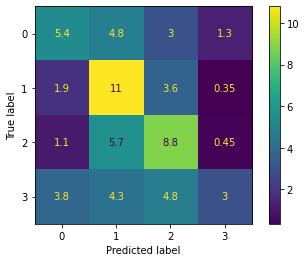

0.4436507936507937


In [40]:
cm_20_fold=0
accu_gnb=0
for i in range(20):
    X_nbg_train, X_nbg_test, y_nbg_train, y_nbg_test = train_test_split(Xs, ys, test_size=0.2) # 80% training and 20% test
    clf,nbg_model,cm,accu = nb_gaussian(X_nbg_train,y_nbg_train, X_nbg_test, y_nbg_test)
    cm_20_fold += cm
    accu_gnb += accu

disp = ConfusionMatrixDisplay(confusion_matrix=cm_20_fold/20, display_labels=clf.classes_)
disp.plot()
plt.show()
print(accu_gnb/20)

### 20-fold linear SVC

Accuracy: 0.4444444444444444
Accuracy: 0.47619047619047616
Accuracy: 0.4126984126984127
Accuracy: 0.4126984126984127
Accuracy: 0.38095238095238093
Accuracy: 0.4126984126984127
Accuracy: 0.3968253968253968
Accuracy: 0.3968253968253968
Accuracy: 0.3968253968253968
Accuracy: 0.5079365079365079
Accuracy: 0.38095238095238093
Accuracy: 0.5238095238095238
Accuracy: 0.5079365079365079
Accuracy: 0.4603174603174603
Accuracy: 0.3968253968253968
Accuracy: 0.42857142857142855
Accuracy: 0.4444444444444444
Accuracy: 0.49206349206349204
Accuracy: 0.4126984126984127
Accuracy: 0.30158730158730157


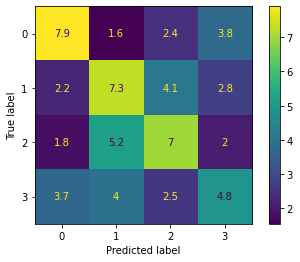

0.42936507936507945


In [52]:
def support_vector_machine(X_train,y_train, X_test, y_test):
    # Create svc classifer object
    clf = SVC(kernel='linear')
    # Train Adaboost Classifer
    model = clf.fit(X_train, y_train)
     
    # Predict the response for test dataset
    y_pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test, y_pred)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",accu)
    cm = confusion_matrix(y_test, y_pred)
    
    return model, cm, accu

svc_20_fold=0
accu_svc=0

for i in range(0,20):
    X_svc_train, X_svc_test, y_svc_train, y_svc_test = train_test_split(Xs, ys, test_size=0.2) # 80% training and 20% test
    svc_model,svc_cm,svc_accu = support_vector_machine(X_svc_train,y_svc_train, X_svc_test, y_svc_test)
    svc_20_fold += svc_cm
    accu_svc += svc_accu

disp = ConfusionMatrixDisplay(confusion_matrix=svc_20_fold/20, display_labels=svc_model.classes_)
disp.plot()
plt.show()
print(accu_svc/20)